In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
nx = 300  # Number of spatial grid points
L = 5.0  # Length of the domain
dt = 0.01  # Time step
a = 1.0 # Advection speed
T = 5.0  # Total simulation time
nt = int(T / dt)  # Number of time steps
dx = L / (nx - 1)  # Spatial resolution

# Grid points
x = np.linspace(0, L, nx)
t = np.linspace(0, T, int(T/dt))

c = a * dt / dx # Courant Number
print(f"Courant Number: {c}")

# Initial condition: Gaussian pulse
def initial_condition(x):
    return np.exp(-((x - L / 4) / 0.1) ** 2)

Courant Number: 0.5980000000000001


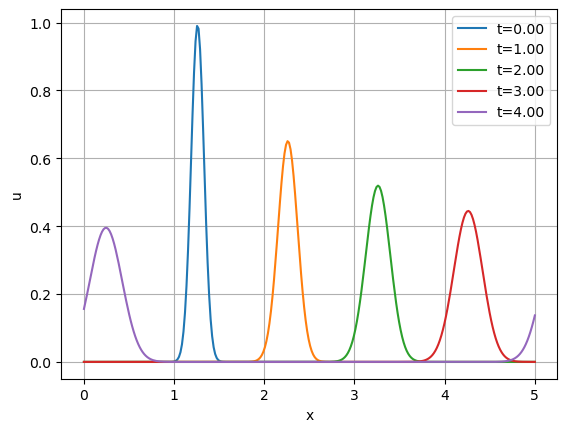

In [ ]:
u = initial_condition(x)  # Initialize solution

u_new = np.zeros_like(u)

for n in range(nt):
    # Apply Upwind update
    u_new[1:] = u[1:] - c * (u[1:] - u[:-1])  # Forward in time, backward in space

    # Periodic boundary condition: Update the first point using the last point
    u_new[0] = u[0] - c * (u[0] - u[-1])

    # Update the field
    u[:] = u_new[:]

    # Plot every few steps
    if n % 100 == 0:
        plt.plot(x, u, label=f"t={n*dt:.2f}")

# Plot results
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.grid()
# plt.savefig(f'Plots/upwind_1d_cfl_{c: .3f}.png')
plt.show()